<a href="https://colab.research.google.com/github/AsadiAhmad/Image-Matching/blob/main/Code/Image_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Step 2: Download Images

In [8]:
!wget https://raw.githubusercontent.com/AsadiAhmad/Image-Matching/main/Pictures/ps5_games.jpg -O ps5_games.jpg
!wget https://raw.githubusercontent.com/AsadiAhmad/Image-Matching/main/Pictures/gost_of_tsushima.jpg -O gost_of_tsushima.jpg

--2025-05-04 18:27:24--  https://raw.githubusercontent.com/AsadiAhmad/Image-Matching/main/Pictures/ps5_games.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 399324 (390K) [image/jpeg]
Saving to: ‘ps5_games.jpg’

ps5_games.jpg       100%[===================>] 389.96K  2.05MB/s    in 0.2s    

2025-05-04 18:27:25 (2.05 MB/s) - ‘ps5_games.jpg’ saved [399324/399324]

--2025-05-04 18:27:25--  https://raw.githubusercontent.com/AsadiAhmad/Image-Matching/main/Pictures/gost_of_tsushima.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

# Step 3: Load Image

In [9]:
query_image = cv.imread('gost_of_tsushima.jpg')
target_image = cv.imread('ps5_games.jpg')

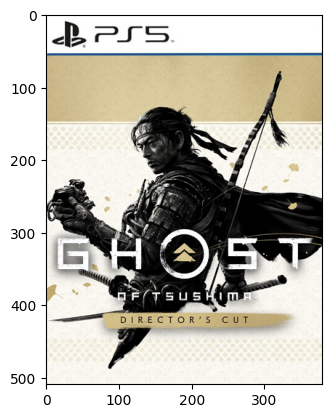

In [11]:
plt.imshow(query_image[...,::-1])

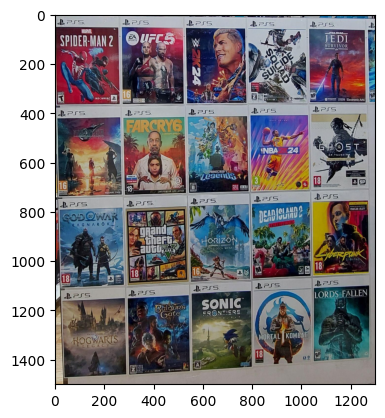

In [12]:
plt.imshow(target_image[...,::-1])

# Step 4: Create the copy of the target Image

In [13]:
result = target_image.copy()

# Step 5: Change Images Color Space into GrayScale

In [14]:
gray_query_image = cv.cvtColor(query_image, cv.COLOR_BGR2GRAY)
gray_target_image = cv.cvtColor(target_image, cv.COLOR_BGR2GRAY)

# Step 6: Use SIFT for detecting keypoints

In [15]:
sift = cv.SIFT_create()

key_point_query, descriptor_query  = sift.detectAndCompute(gray_query_image, None)
key_point_target, descriptor_target = sift.detectAndCompute(gray_target_image, None)

# Step 7: Calculate FLANN parameters

In [16]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptor_query, descriptor_target, k=2)

# Step 8: Refine matches

In [ ]:
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

MIN_MATCH_COUNT = 10


if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ key_point_query[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ key_point_target[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = gray_query_image.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    result = cv.polylines(result,[np.int32(dst)],True,(0,255,0),3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

# Step 9: Show Result

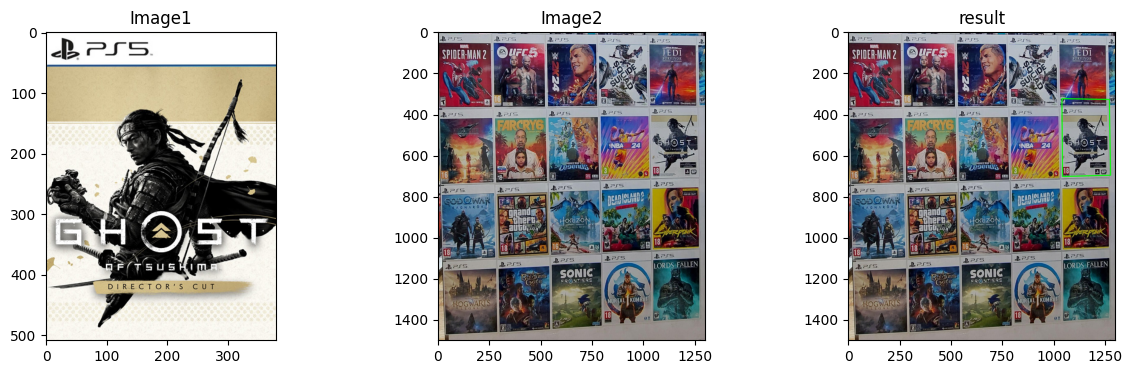

In [18]:
plt.figure(figsize=[15,4])
plt.subplot(131),plt.imshow(query_image[...,::-1]),plt.title('Image1');
plt.subplot(132),plt.imshow(target_image[...,::-1]),plt.title('Image2');
plt.subplot(133),plt.imshow(result[...,::-1]),plt.title('result');